<a href="https://colab.research.google.com/github/Mohanlakshmi1205/Mohan-Lakshmi/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.12.0

In [3]:
import tensorflow as tf    # Checking the version of Tensorflow.
print(tf.__version__)

2.18.0


In [4]:
# Import some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Divide the dataset into X_train(independent) and y_train(dependent)
X = data.drop(columns=["RowNumber",	"CustomerId",	"Surname", "Exited"],axis=1)
Y = data["Exited"]

In [8]:
# we can write in this way also
Xx = data.iloc[:,3:13]
Yy = data.iloc[:,13]

In [9]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [10]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [12]:
print(geo)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]


In [13]:
print(gender)

      Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[10000 rows x 2 columns]


In [14]:
X = X.drop(["Geography","Gender"],axis = 1)

In [15]:
print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10  


In [16]:
X = pd.concat([X,geo,gender],axis=1)

In [ ]:
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Female  Male  
0                  1        101348.88        0      0       1     0  
1      

In [17]:
# splitting the dataset into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# We have to feature scaling to the dataset

SS = StandardScaler()

In [20]:
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [21]:
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57638802 -0.91324755
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ... -0.57638802 -0.91324755
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ...  1.73494238 -0.91324755
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57638802  1.09499335
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57638802 -0.91324755
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ... -0.57638802 -0.91324755
   0.91324755]]


In [22]:
print(X_test)

[[-0.57749609 -0.6557859  -0.69539349 ... -0.57638802 -0.91324755
   0.91324755]
 [-0.29729735  0.3900109  -1.38944225 ... -0.57638802 -0.91324755
   0.91324755]
 [-0.52560743  0.48508334 -0.3483691  ...  1.73494238  1.09499335
  -1.09499335]
 ...
 [ 0.81311987  0.77030065  0.69270405 ... -0.57638802  1.09499335
  -1.09499335]
 [ 0.41876609 -0.94100321 -0.3483691  ... -0.57638802 -0.91324755
   0.91324755]
 [-0.24540869  0.00972116 -1.38944225 ... -0.57638802 -0.91324755
   0.91324755]]


In [71]:
print(Y_test)
print(Y_test.shape)
print(Y_train.shape)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64
(2000,)
(8000,)


In [23]:
X_train.shape

(8000, 12)

In [24]:
X_test.shape

(2000, 12)

In [25]:
# Now lets create ANN

from tensorflow.keras.models import Sequential   # For input layer
from tensorflow.keras.layers import Dense        # For hidden, output layer
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU   # Activation function
from tensorflow.keras.layers import Dropout      # If some neurons will deactive then this will use
# drop out will remove the dead neurons in the process of forword or backward propogation. It will prevent from overfitting.

In [29]:
# Lets initialize the ANN

classifier = Sequential()

In [31]:
# Adding the input layer

classifier.add(Dense(units=11,activation="relu"))

In [43]:
# Adding the hidden layer 1

classifier.add(Dense(units=7,activation="relu"))

In [44]:
# Adding the hidden layer 2
classifier.add(Dense(units=6,activation="relu"))

In [42]:
# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

In [36]:
classifier.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [37]:
# Early_stopping

import tensorflow as tf
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
model_history = classifier.fit(X_train,Y_train,validation_split = 0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6611 - loss: 0.6057 - val_accuracy: 0.7944 - val_loss: 0.4534
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8040 - loss: 0.4461 - val_accuracy: 0.8277 - val_loss: 0.4185
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8254 - loss: 0.4100 - val_accuracy: 0.8357 - val_loss: 0.3981
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8456 - loss: 0.3792 - val_accuracy: 0.8432 - val_loss: 0.3810
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8595 - loss: 0.3549 - val_accuracy: 0.8413 - val_loss: 0.3745
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3500 - val_accuracy: 0.8451 - val_loss: 0.3711
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8559 - loss: 0.3545 - val_accuracy: 0.8440 - val_loss: 0.3699
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8555 - loss: 0.3476 - 

In [39]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

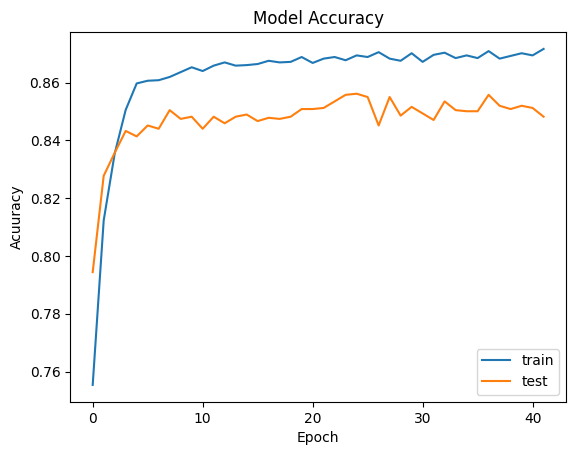

In [40]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend(["train", "test"])
plt.show()


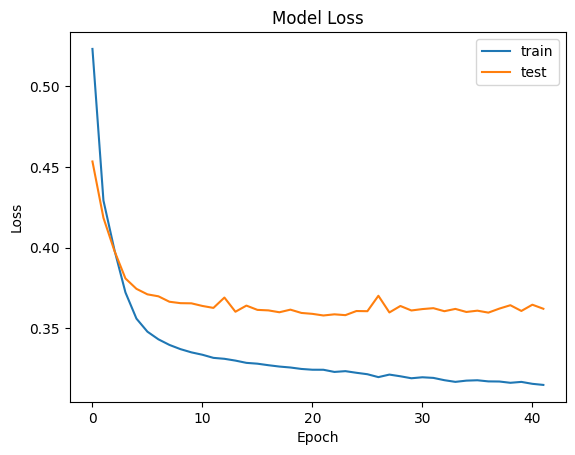

In [41]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"])
plt.show()